In [ ]:
from matplotlib import pyplot as plt
from nltk.book import Text
from nltk.corpus import stopwords

from judilibre_eda.corpus import JudilibreCorpusReader
from judilibre_eda.utils import remove_stop_words

from dstb.language.visualizations import plot_word_cloud
from dstb.language.collocations import (
    collocation_2,
    collocation_3,
    collocation_4,
    collocation_measure_correlation,
    detailed_collocation_2,
)

In [2]:
judilibre_corpus = JudilibreCorpusReader()
judilibre_text = Text(judilibre_corpus.words())
stop_words = set(stopwords.words("french"))
judilibre_vocab = judilibre_text.vocab()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'de'),
  Text(1, 0, 'la'),
  Text(2, 0, 'du'),
  Text(3, 0, 'à'),
  Text(4, 0, 'le'),
  Text(5, 0, 'que'),
  Text(6, 0, 'et'),
  Text(7, 0, 'des'),
  Text(8, 0, 'en'),
  Text(9, 0, 'par'),
  Text(10, 0, 'les'),
  Text(11, 0, 'qui'),
  Text(12, 0, 'DE'),
  Text(13, 0, 'au'),
  Text(14, 0, 'pas'),
  Text(15, 0, 'une'),
  Text(16, 0, 'un'),
  Text(17, 0, 'ne'),
  Text(18, 0, "l'article"),
  Text(19, 0, "d'un")])

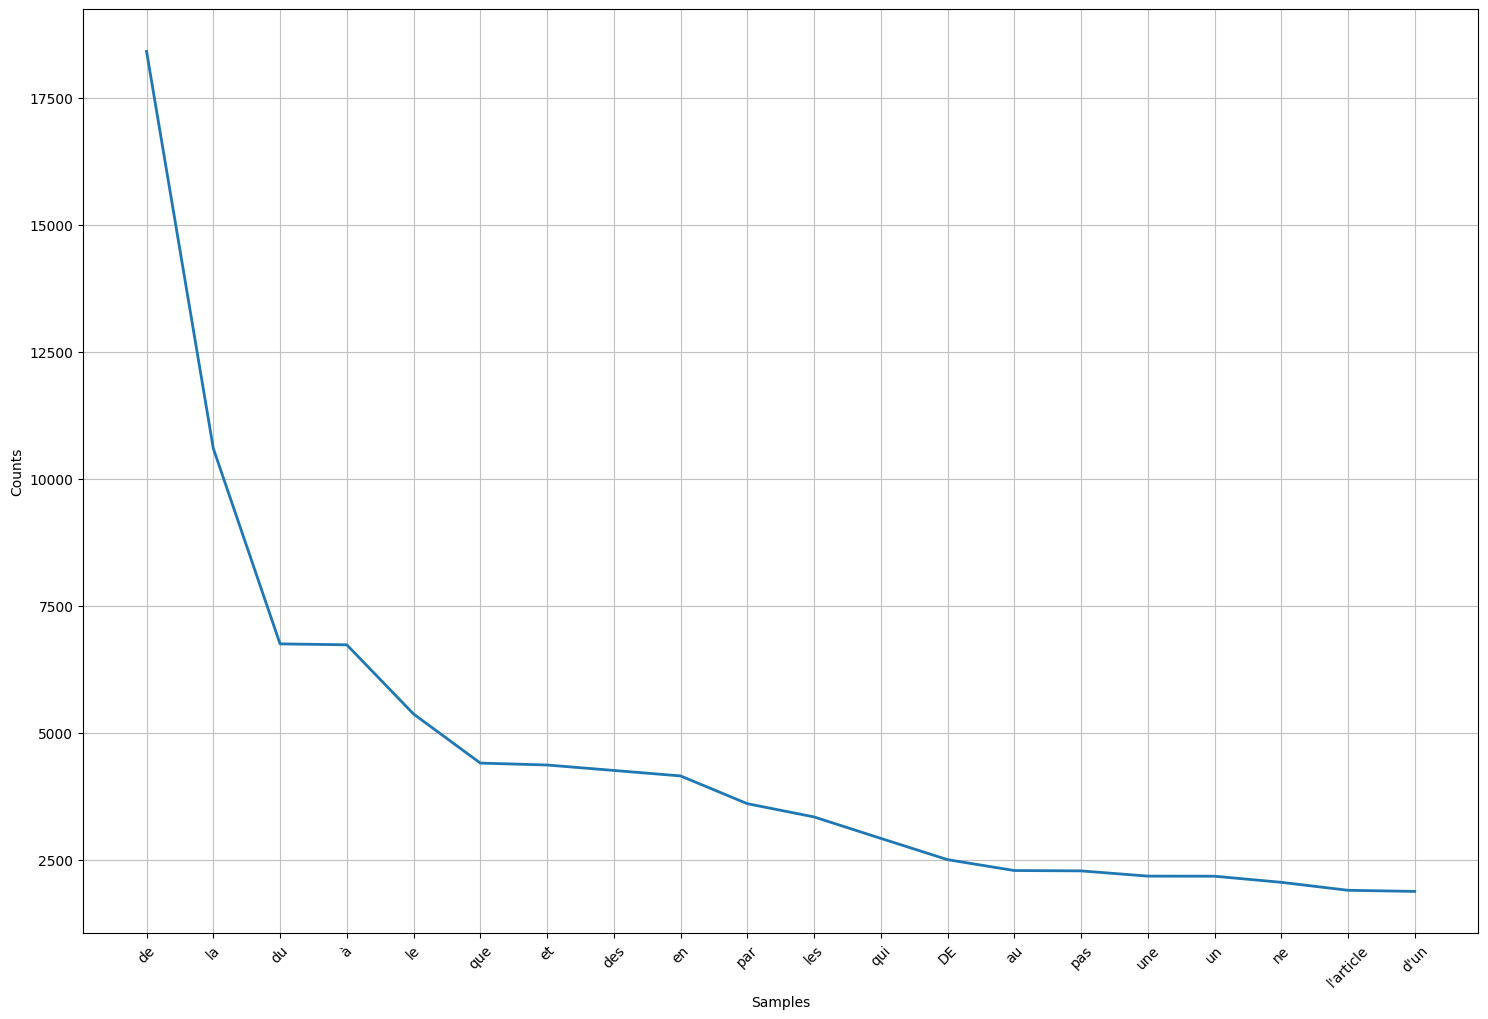

In [3]:
plt.figure(figsize=(18, 12))
judilibre_vocab.plot(20, cumulative=False, percents=False, show=False)
plt.xticks(rotation=45)

In [4]:
# judilibre_text.concordance("notaire")
# judilibre_text.generate(length=10)
judilibre_text.similar("avocat")

notaire acte époux client immeuble profit droit tiers recours terme
paiement prêt mandataire compte bail héritier mari épouse conjoint
écrit


In [5]:
remove_stop_words(judilibre_vocab, stop_words)

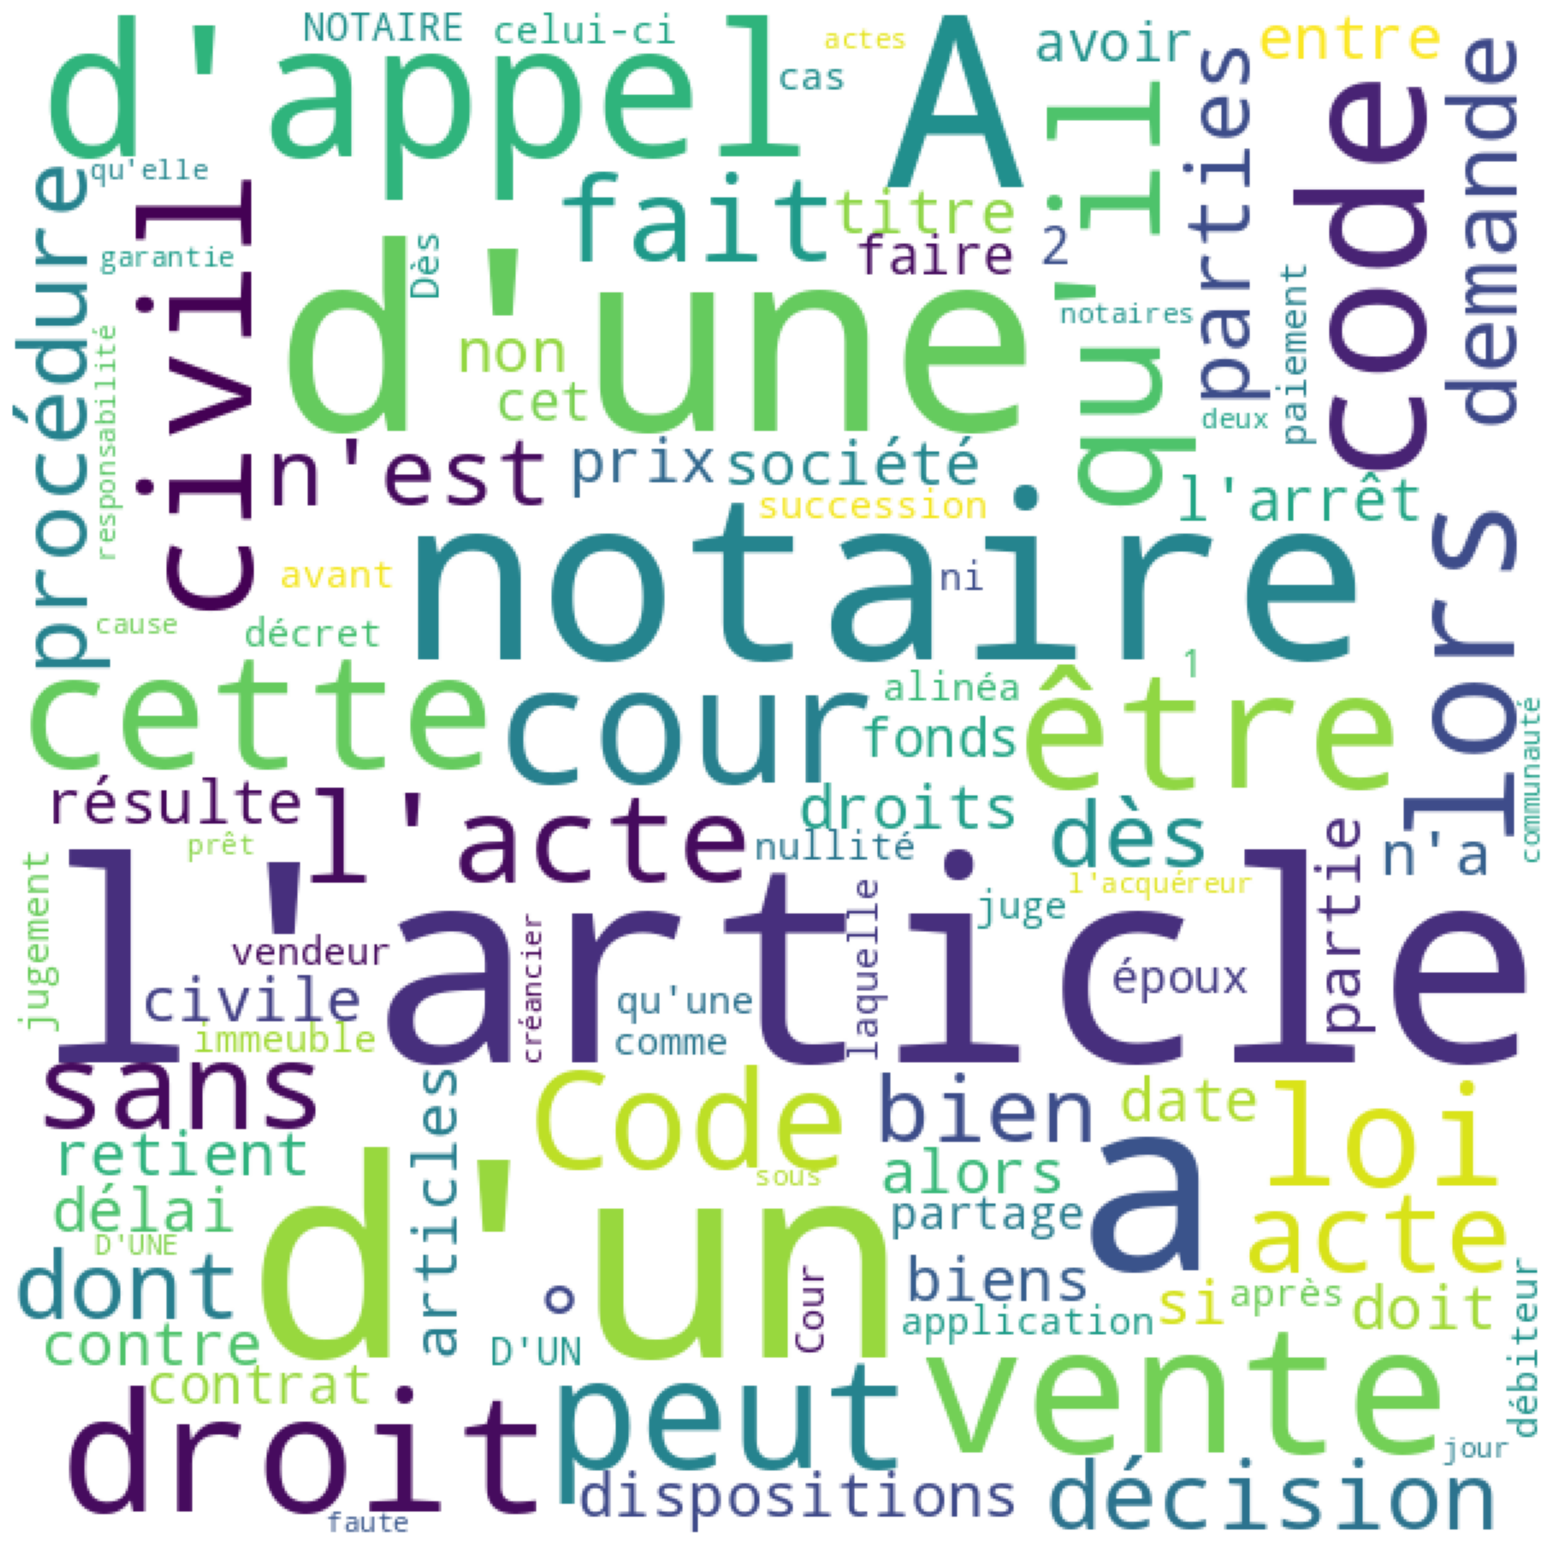

In [34]:
n_most_common = judilibre_vocab.most_common(100)
plot_word_cloud({i[0]:i[1] for i in n_most_common})

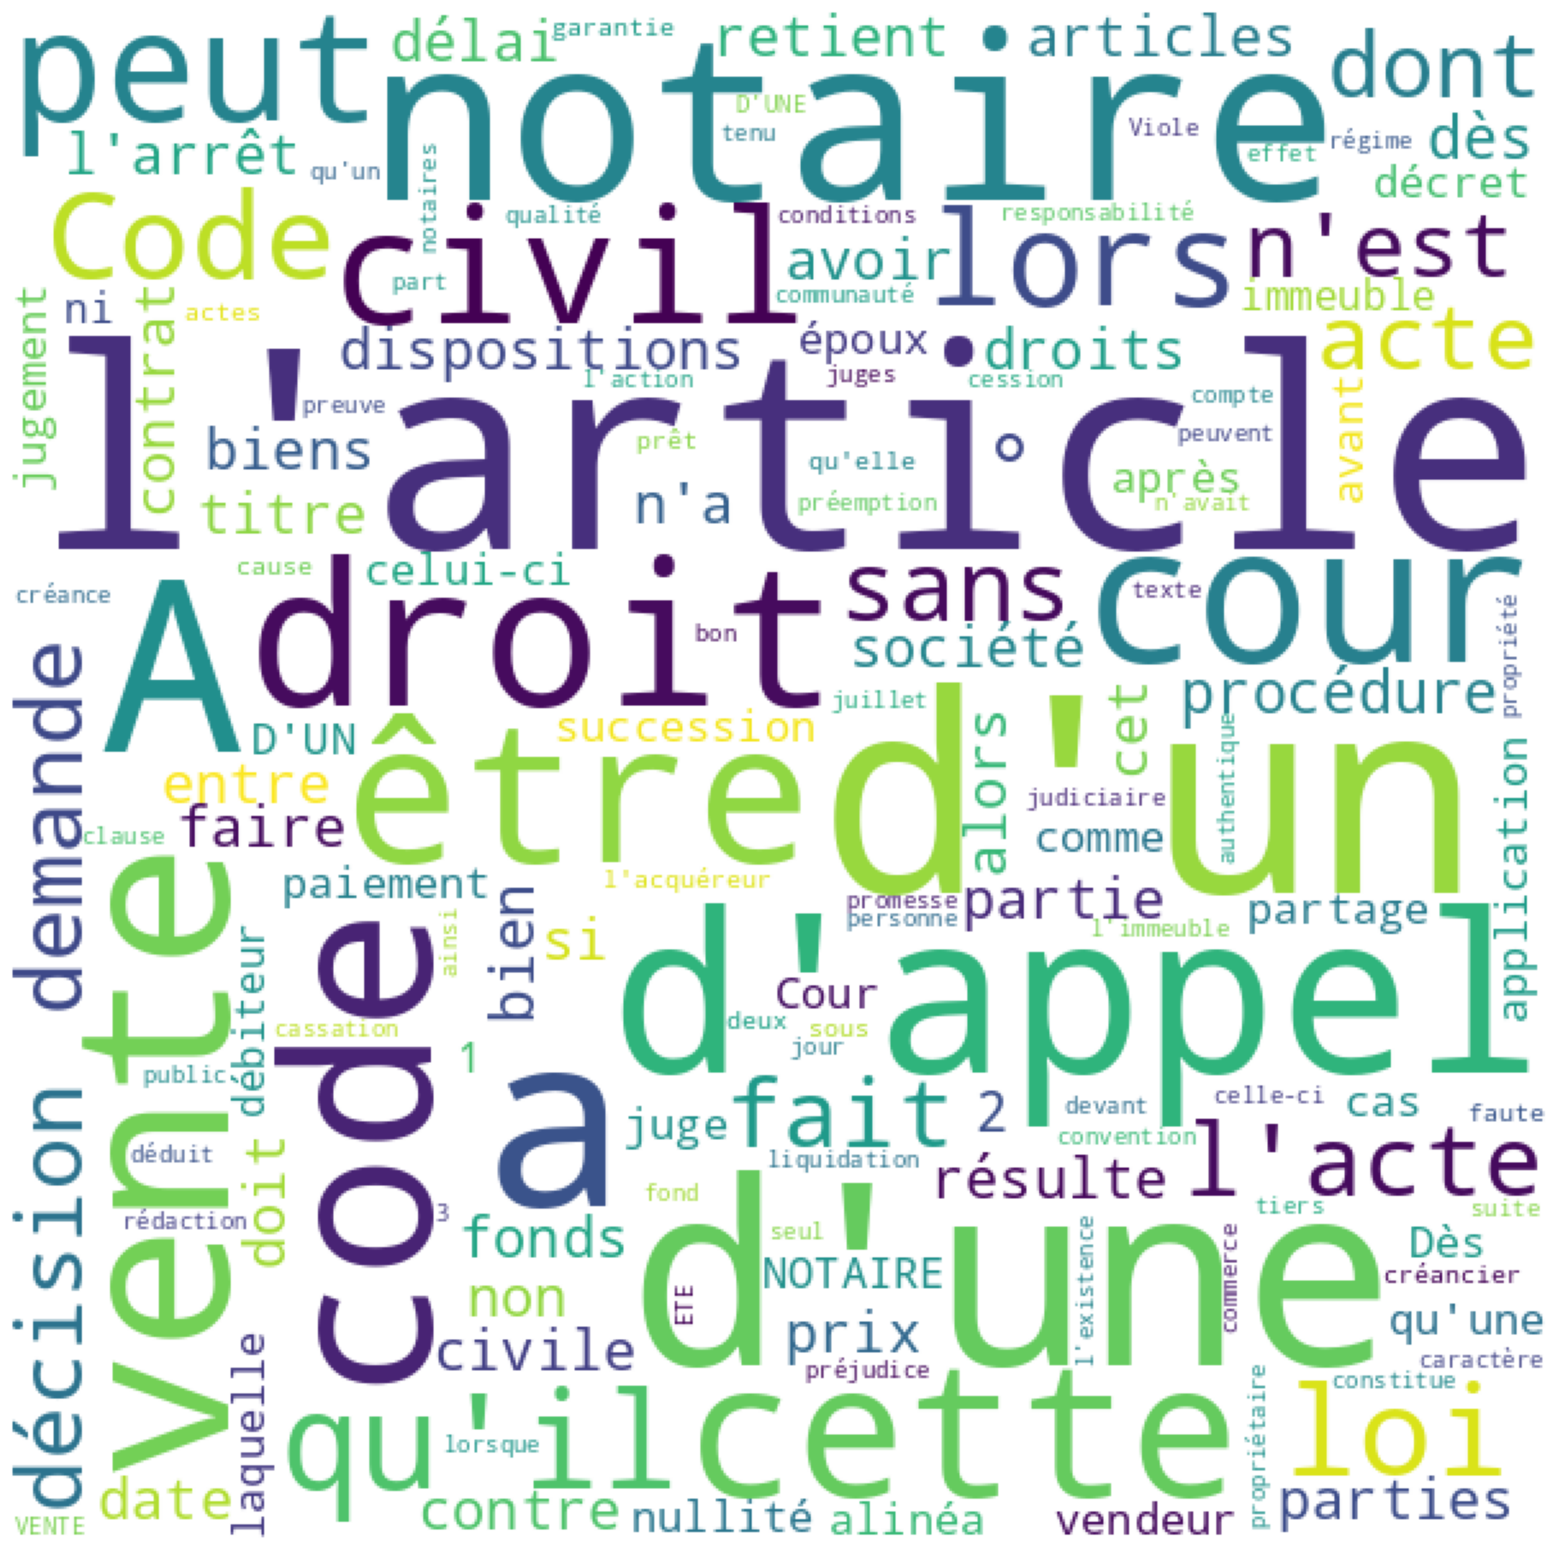

In [9]:
plot_word_cloud(judilibre_vocab)

In [10]:

df_result = detailed_collocation_2(
    judilibre_text, judilibre_vocab, stop_words=stop_words, num=30
)
print(df_result.to_markdown())

|    | w_1       |   w_1_count | w_2         |   w_2_count |     score |   p-value |
|---:|:----------|------------:|:------------|------------:|----------:|----------:|
|  0 | cour      |         948 | d'appel     |        1230 | 14779.7   |         0 |
|  1 | code      |        1051 | civil       |         830 |  9034.44  |         0 |
|  2 | dès       |         477 | lors        |         773 |  8061.61  |         0 |
|  3 | bon       |         205 | droit       |         972 |  2470.06  |         0 |
|  4 | procédure |         496 | civile      |         371 |  2074.79  |         0 |
|  5 | peut      |         817 | être        |         952 |  1936.88  |         0 |
|  6 | doit      |         368 | être        |         952 |  1856.48  |         0 |
|  7 | d'un      |        1879 | immeuble    |         261 |  1694.56  |         0 |
|  8 | chose     |         157 | jugée       |         110 |  1512.34  |         0 |
|  9 | après     |         296 | avoir       |         326 |  147

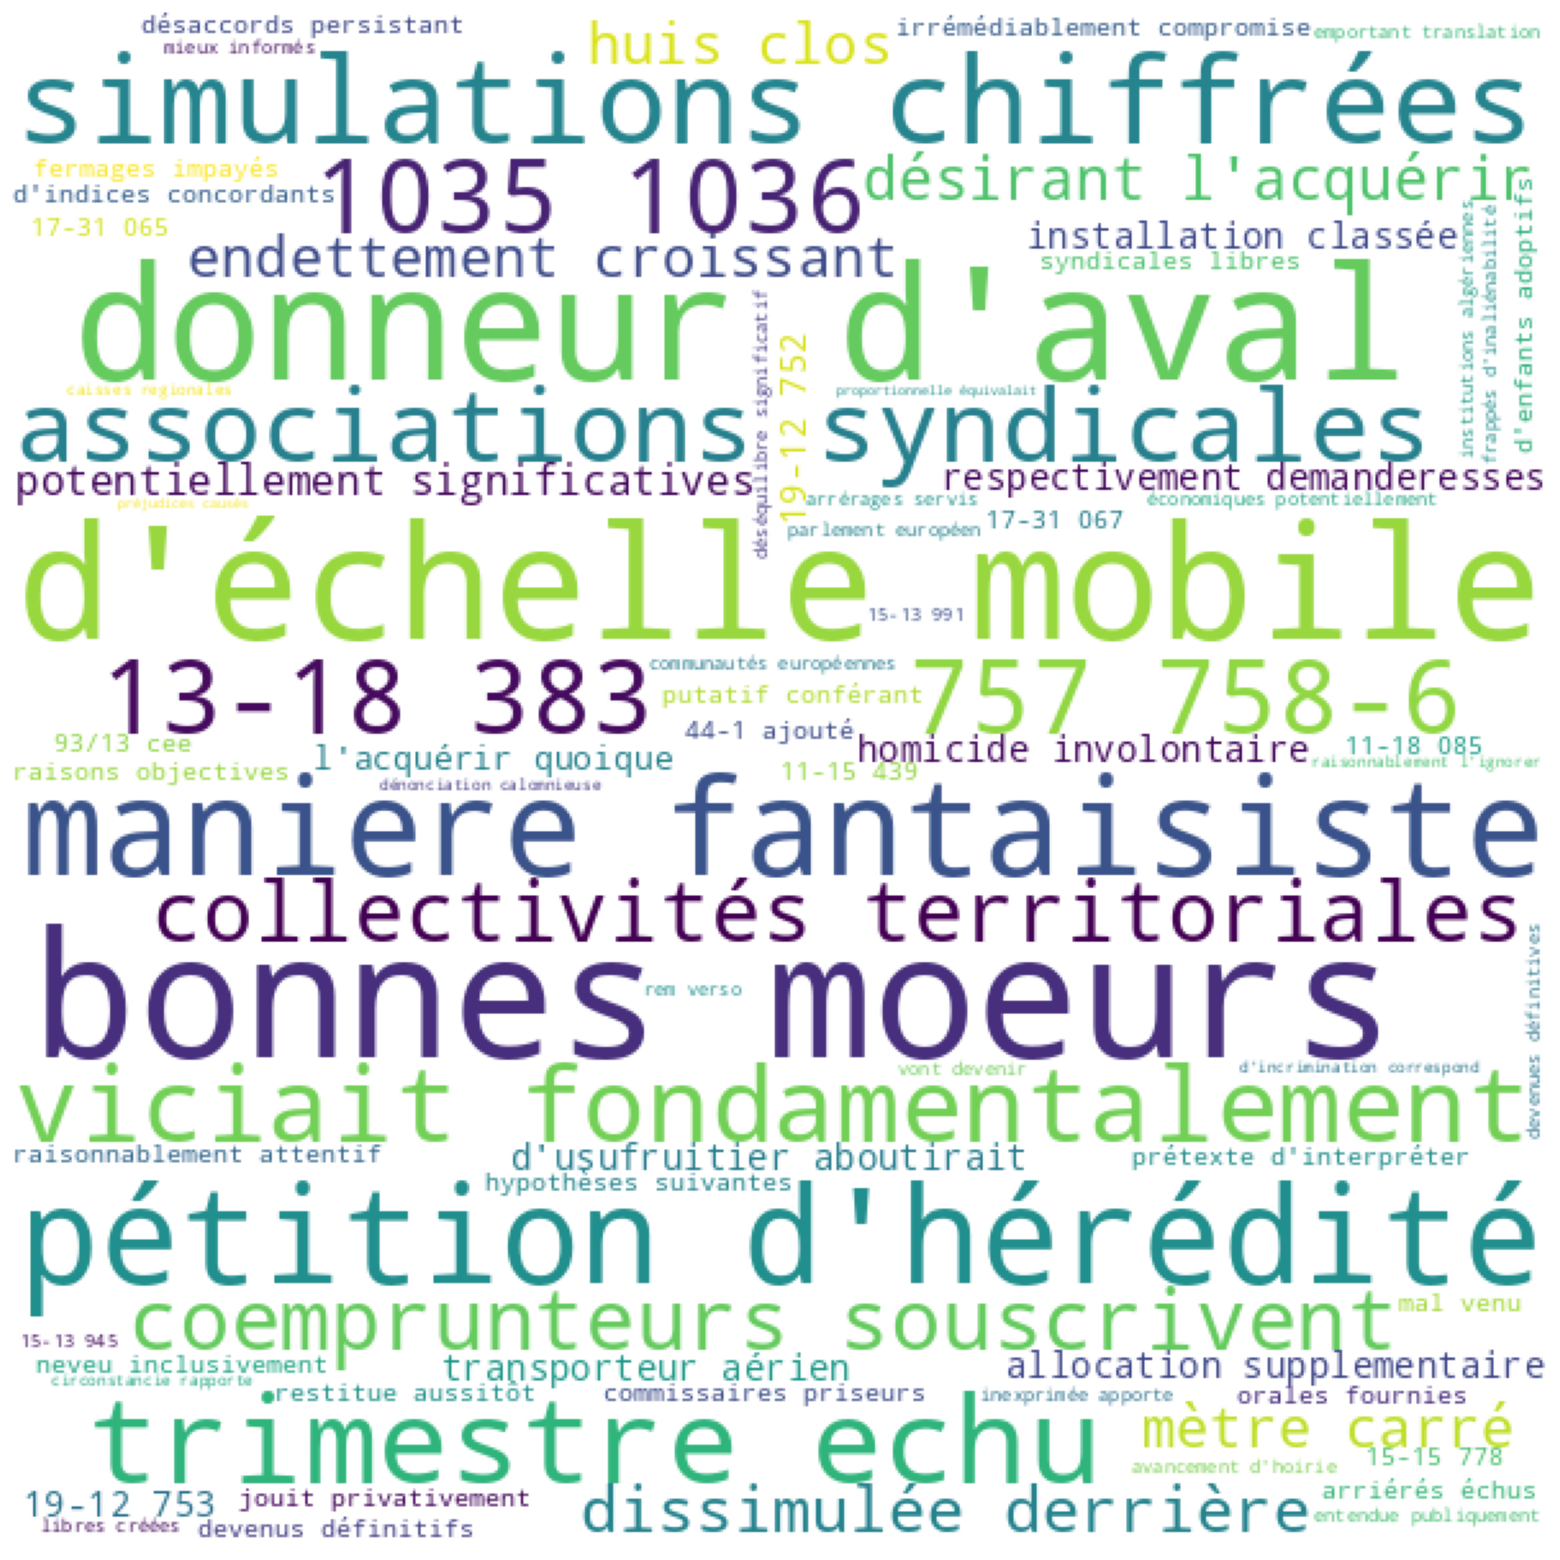

In [32]:
# method = ["pmi", "llr"]
res = collocation_2(judilibre_text, method="pmi", stop_words=stop_words, window_size=2, num=80)
plot_word_cloud(res)

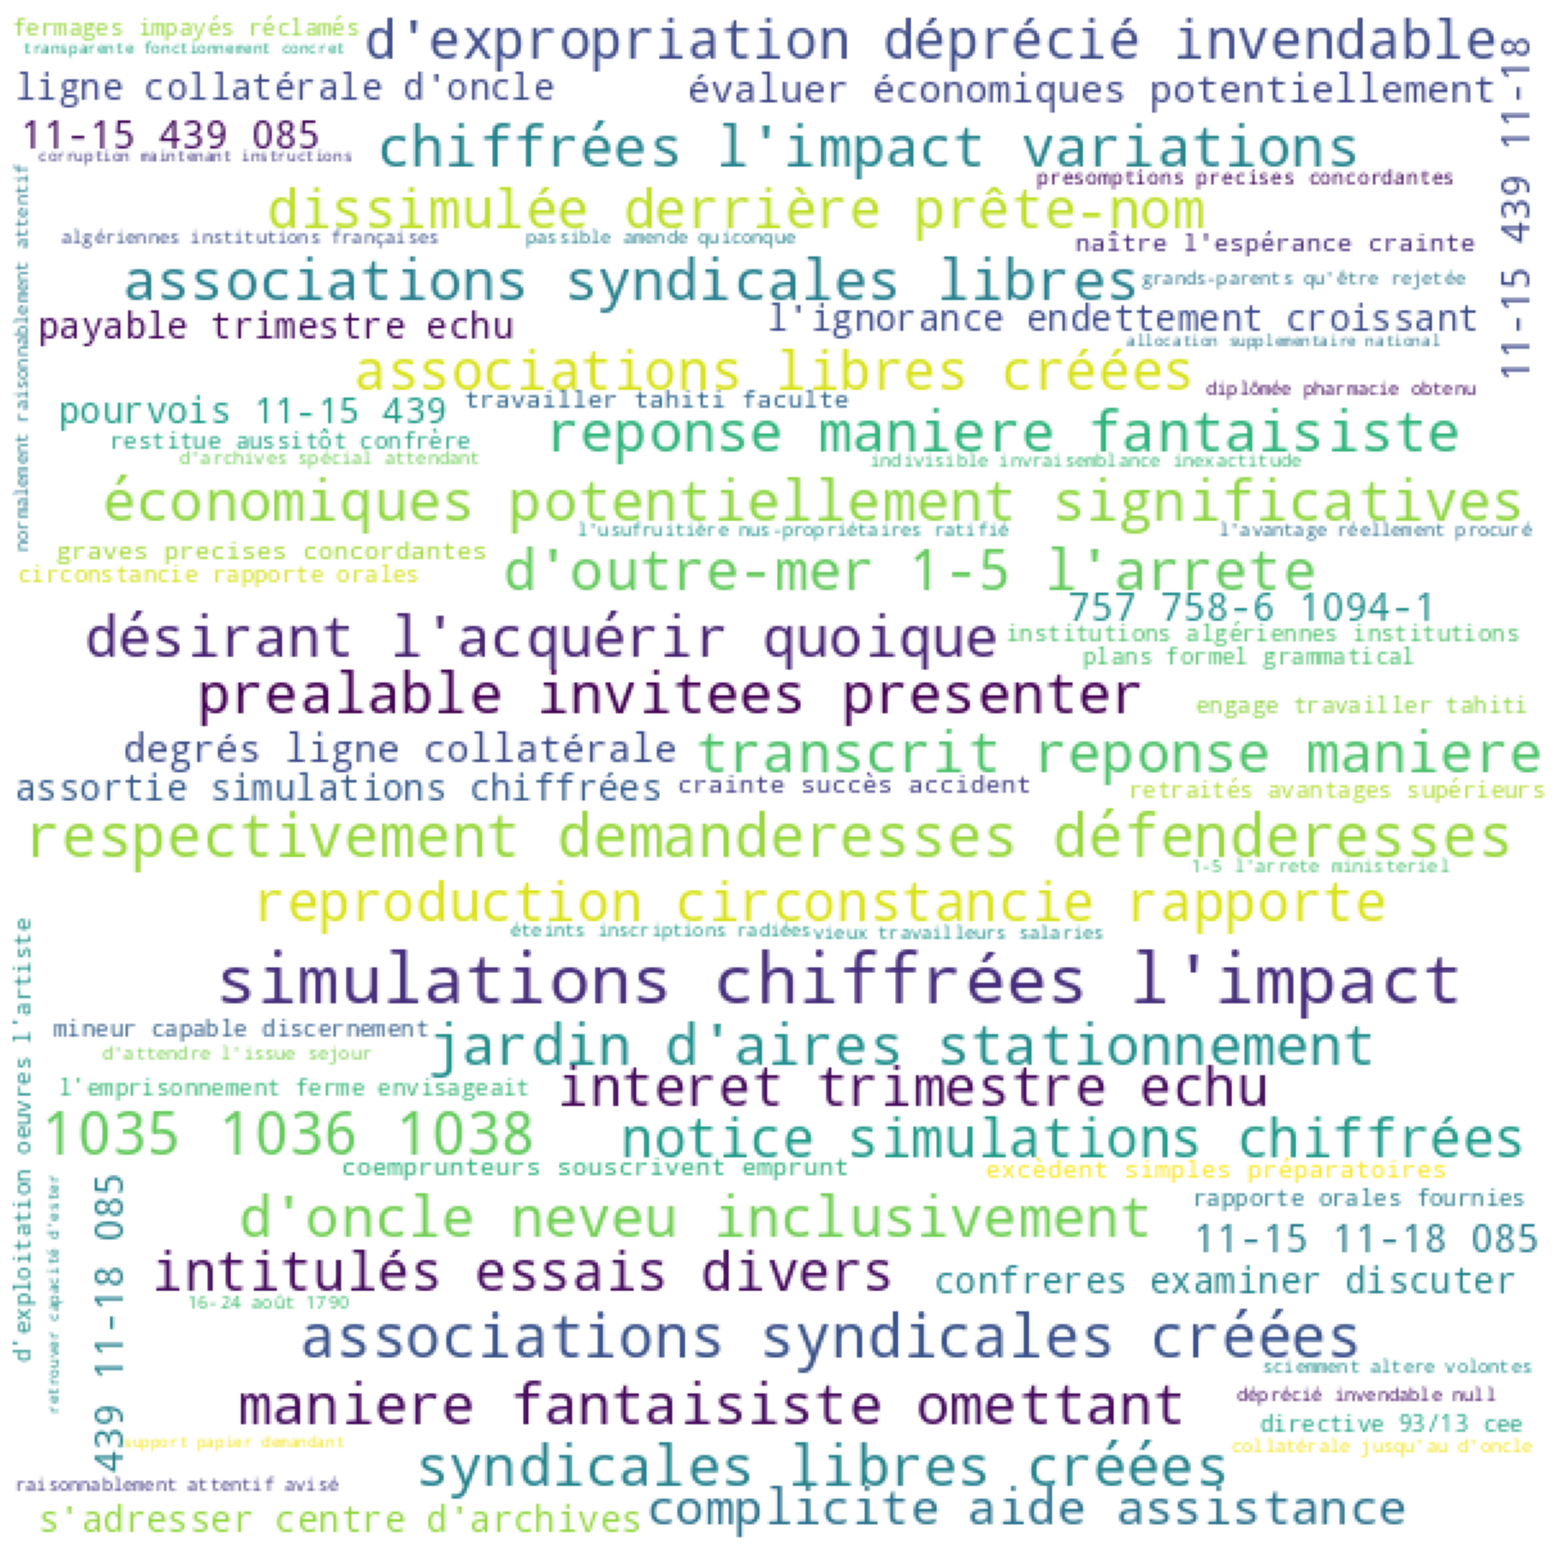

In [28]:
# window_size = [3,4,...]
res = collocation_3(judilibre_text, stop_words=stop_words, method="pmi", window_size=5, num=80)
plot_word_cloud(res)

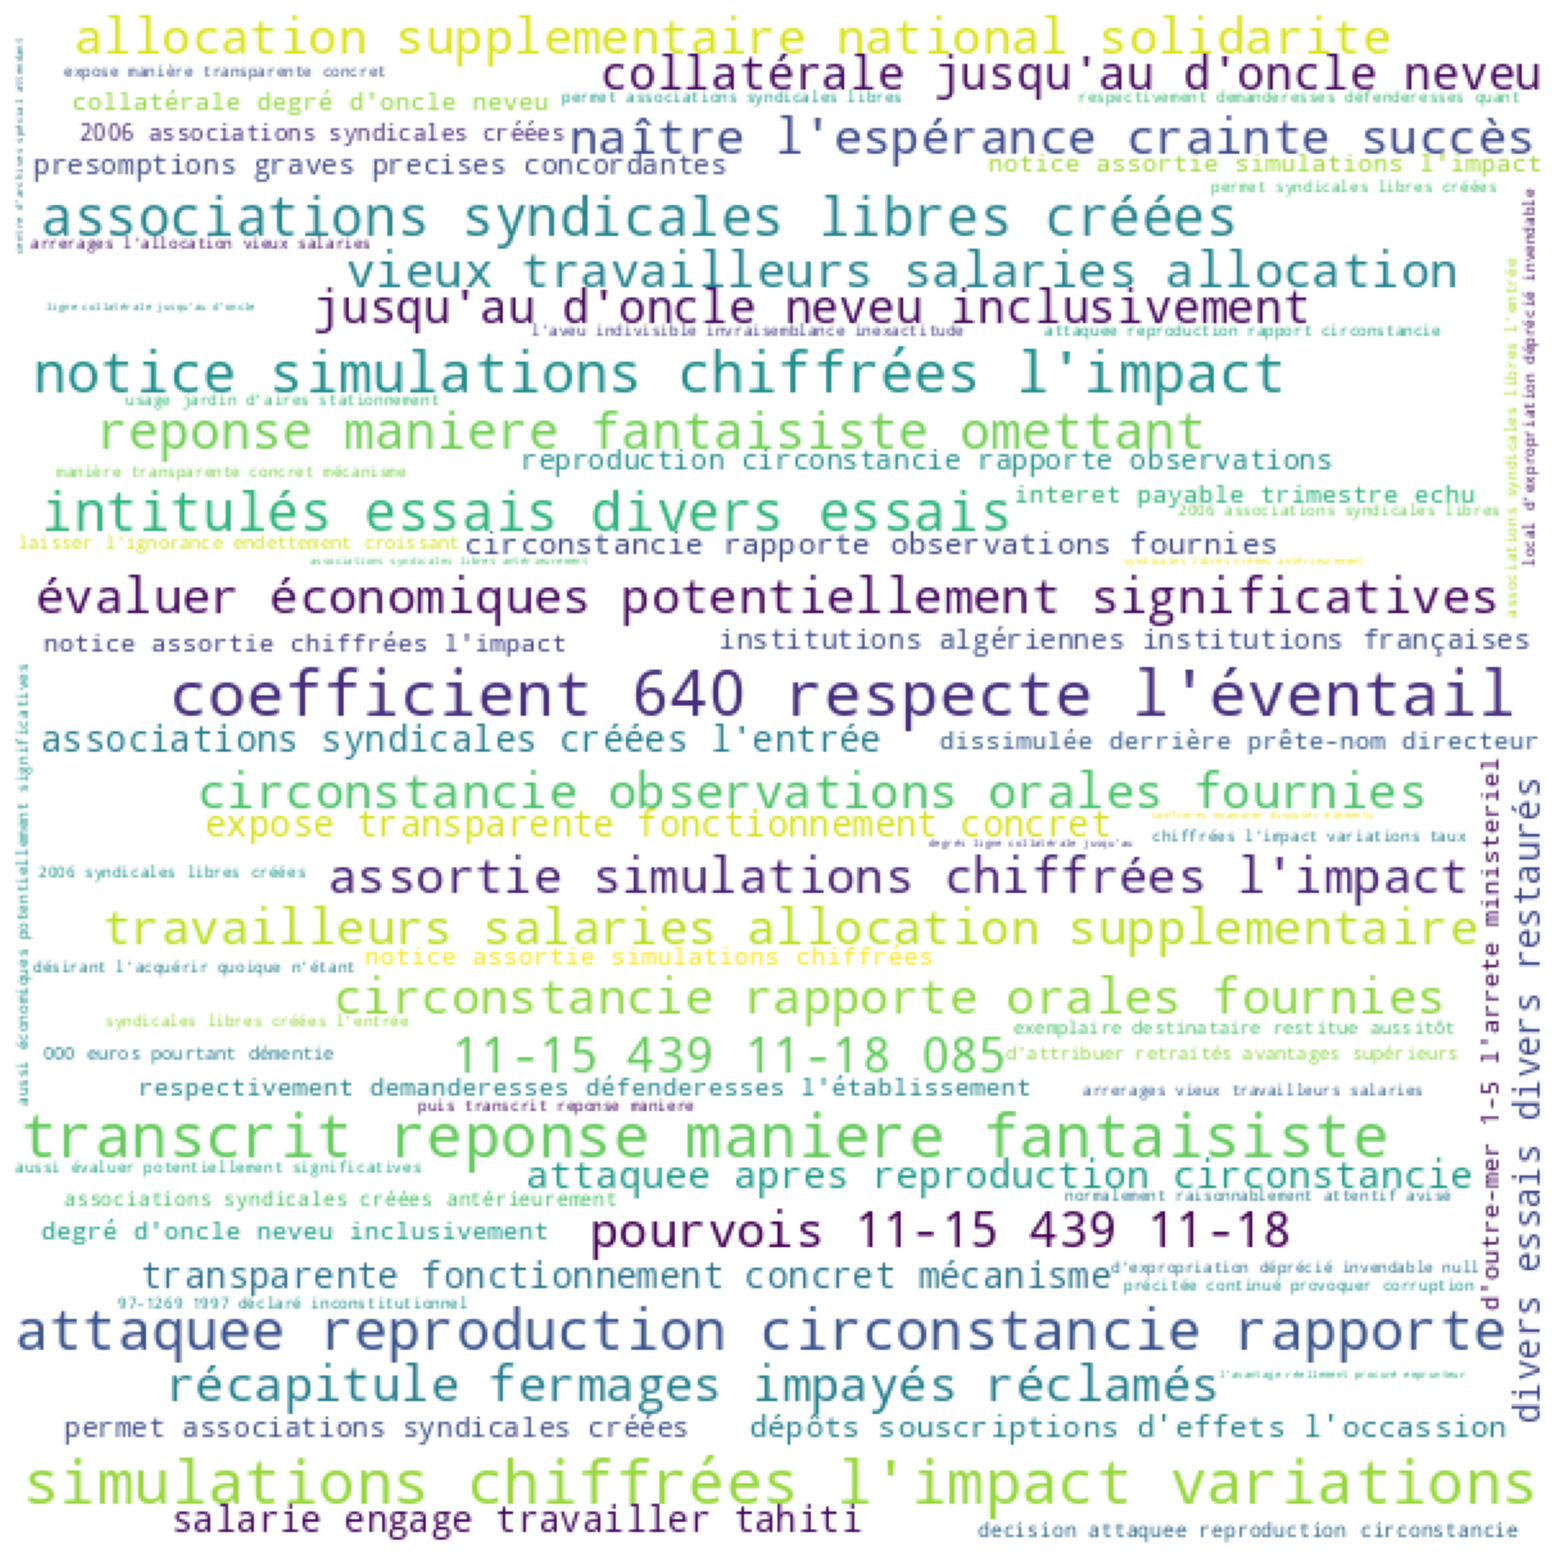

In [30]:
res = collocation_4(judilibre_text, stop_words=stop_words, method="pmi", window_size=7, num=80)
plot_word_cloud(res)

In [ ]:
collocation_measure_correlation(judilibre_text, stop_words=stop_words)